In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [104]:
df = pd.read_csv('titanic.csv')

In [105]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [106]:
df['Embarked'].fillna('S')

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object

In [108]:
df['Embarked'].isnull()

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Name: Embarked, Length: 891, dtype: bool

# Exaploratory Data Analysis

Created heatmap in order to check all the missing value in our dataset

<AxesSubplot:>

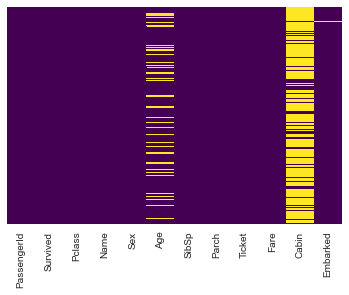

In [67]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

The proportion of Age missing is likely small enough for reasonable replacement with some form of imputation. At the same time Cabin column consists of too much missing value.

C:\Users\Abhinav Bagwari\anaconda3\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


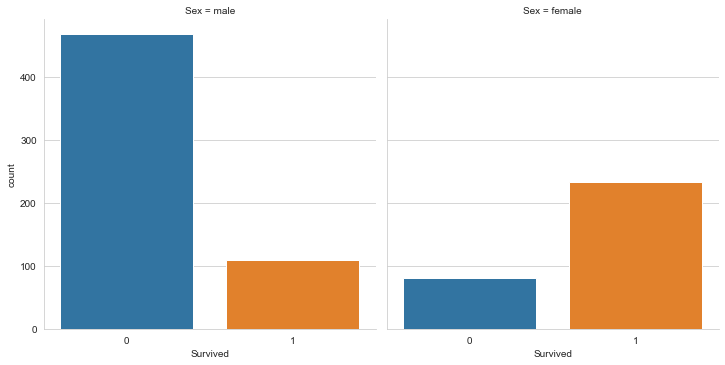

In [68]:
sns.factorplot(x="Survived",col='Sex',kind='count',data=df)

<AxesSubplot:xlabel='Sex', ylabel='Age'>

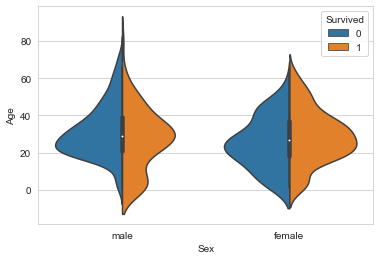

In [69]:
sns.violinplot(x='Sex',y='Age',hue='Survived',data=df,split=True)

 this means that most of the males and females were between 20–40 years old of age.

<AxesSubplot:xlabel='Survived', ylabel='count'>

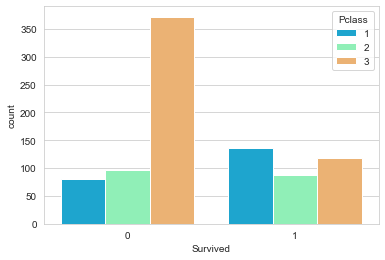

In [70]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=df,palette='rainbow')

C:\Users\Abhinav Bagwari\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


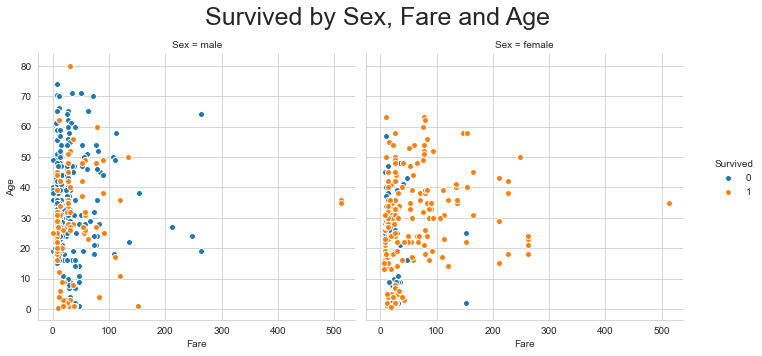

In [76]:
g = sns.FacetGrid(df, size=5,hue="Survived", col ="Sex", margin_titles=True)
g.map(plt.scatter, "Fare", "Age",edgecolor="w").add_legend()
g.fig.suptitle("Survived by Sex, Fare and Age", size = 25)
plt.subplots_adjust(top=0.85)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

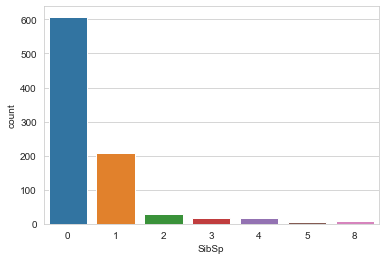

In [77]:
sns.countplot(x='SibSp',data=df)

<AxesSubplot:>

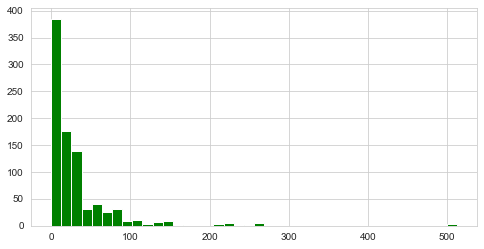

In [78]:
df['Fare'].hist(color='green',bins=40,figsize=(8,4))

Fare

# Data Cleaning

We want to fill in missing age data instead of just dropping the missing age data rows. One way to do this is by filling in the mean age of all the passengers or check the average age by passenger class

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

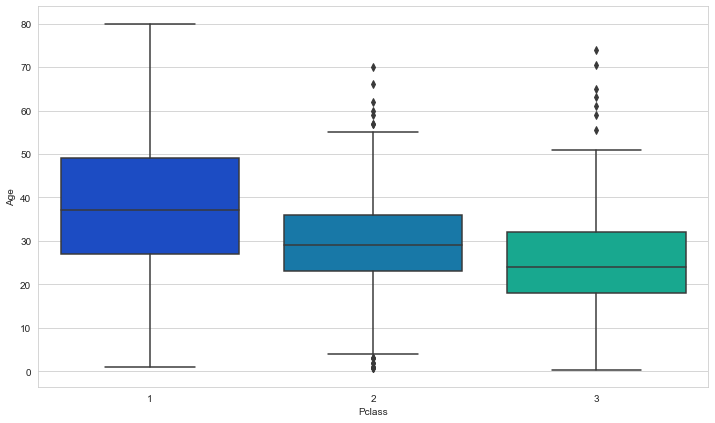

In [59]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=df,palette='winter')

We can see the wealthier passengers in the higher classes tend to be older, which makes sense. We'll use these average age values to impute based on Pclass for Age.

In [60]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

In [61]:
df['Age'] = df[['Age','Pclass']].apply(impute_age,axis=1)
df.drop('Cabin',axis=1,inplace=True)

<AxesSubplot:>

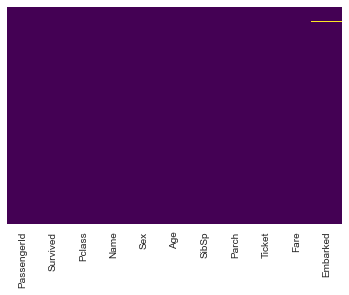

In [62]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Finally our data looks much better as we are now able to handle almost all the missing value.

# Statistical Test

In [81]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


Overview:
only 38% passenger survived during that tragedy.
~74% female passenger survived, while only ~19% male passenger survived.
~63% first class passengers survived, while only 24% lower class passenger survived.

In [82]:
pd.DataFrame(abs(df.corr()['Survived']).sort_values(ascending = False))

,Survived
Survived,1.000000
Pclass,0.338481
Fare,0.257307
Parch,0.081629
Age,0.077221
SibSp,0.035322
PassengerId,0.005007


Sex is the most important correlated feature with Survived(dependent variable) feature followed by Pclass.

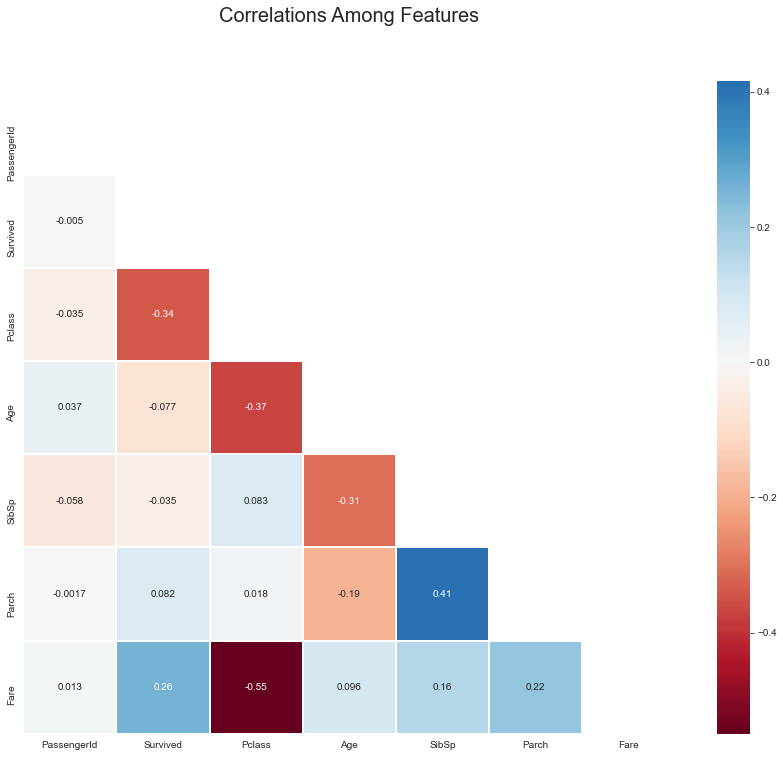

In [84]:
import numpy as np
mask = np.zeros_like(df.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.set_style('whitegrid')
plt.subplots(figsize = (15,12))
sns.heatmap(df.corr(), 
            annot=True,
            mask = mask,
            cmap = 'RdBu',
            linewidths=.9, 
            linecolor='white',
            fmt='.2g',
            center = 0,
            square=True)
plt.title("Correlations Among Features", y = 1.03,fontsize = 20, pad = 40);

#### Positive Correlation Features:

###### Fare and Survived: 0.26

#### Negative Correlation Features:


##### Fare and Pclass: -0.6
##### Sex and Survived: -0.55
##### Pclass and Survived: -0.33

### Statistical Test for Correlation

Our general assumption: “First-class people had a higher survival rate than third-class people”

#### Null Hypothesis: The socio-economic class of the people didn’t have an effect on the survival rate.

#### Alternative Hypothesis: The socio-economic class of the people affected their survival rate.

In [86]:
First_Class_Sample = np.array([np.mean(df[df["Pclass"]==1].sample(20)["Survived"].values) for i in range(100)])
third_Class_Sample = np.array([np.mean(df[df["Pclass"]==3].sample(20)["Survived"].values) for i in range(100)])

C:\Users\Abhinav Bagwari\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Abhinav Bagwari\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


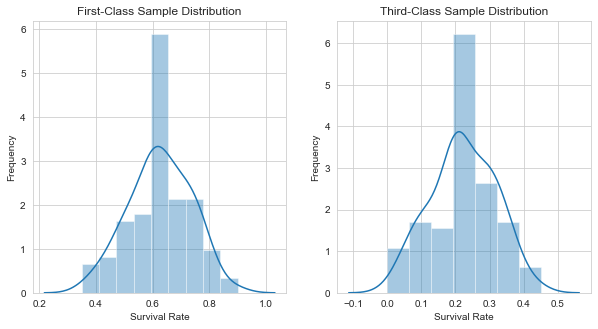

In [89]:
plt.subplots(1, 2, figsize = (10, 5))
plt.subplot(1,2, 1)
sns.distplot(First_Class_Sample)
plt.title("First-Class Sample Distribution")
plt.xlabel("Survival Rate")
plt.ylabel("Frequency")
plt.subplot(1, 2, 2)
sns.distplot(third_Class_Sample)
plt.title("Third-Class Sample Distribution")
plt.xlabel("Survival Rate")
plt.ylabel("Frequency")
plt.show()

According to the sample distributions, the effect of the class is 0.6105 – 0.235.

Z-score is a measurement that describes how unlikely it is that the effect was taken from the normal distribution of the population. If we assume that the Null hypothesis is true (assume that the class has no effect on the survival rate) then the difference of the distribution of the two populations (the real populations not the sample)should have a mean of zero. The z-score of the observed effect will then describe how many standard deviations that effect is from the zero. If it’s too large, then it’s unlikely that this effect was taken from that distribution.

In [92]:
effect = np.mean(First_Class_Sample) - np.mean(third_Class_Sample)
sigma_first = np.std(First_Class_Sample)
sigma_third = np.std(third_Class_Sample)
sigma_difference = np.sqrt((sigma_first**2)/len(First_Class_Sample)  +  (sigma_third**2)/len(third_Class_Sample))
z_score = effect / sigma_difference
z_score

27.851142598620008

### Conclusion

The conclusion is that the provided sample proves a significant correlation between the socioeconomic class and the survival rate.By looking into the outputed value we can conclude that richer people had a better chance of survival at the ship.

## Building Machine Learning Model

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
